### Analyse der Wortfrequenzen zu BVG, HVV und MVG in Medienberichten

Dieses Notebook liefert eine quantitativ-explorative Übersicht über die Wortfrequenzen zu den Verkehrsunternehmen Berliner Verkehrsbetriebe (BVG), Hamburger Verkehrsverbund (HVV) inklusive Verkehrsbetriebe Hamburg-Holstein (VHH) und Hamburger Hochbahn sowie Münchner Verkehrsgesellschaft (MVG).

Es handelt sich um eine erste grobe Analyse auf Aggregationsebene, in der anhand einfacher Zählungen untersucht wird, wie häufig die Begriffe BVG, HVV und MVG in verschiedenen Medienquellen und Jahren vorkommen.  
Dabei werden alle Wörter aus dem gesammelten HTML-Seiteninhalt einbezogen, unabhängig vom inhaltlichen Kontext oder ihrer Platzierung im Text.

Visualisierungen umfassen:
- Häufigkeit nach Medium und Jahr (Heatmaps, gruppierte Balkendiagramme)  
- Verteilung nach thematischen Clustern  
- Wordclouds für Wortformen rund um BVG, HVV und MVG

#### 1. Import benötigte Pakete

In [1]:
# Standard
import os # Dateipfaden
import pandas as pd # Datenanalyse

# Visualisierung
import seaborn as sns # Statistische Diagramme
import matplotlib.pyplot as plt # Diagrammerstellung 

# Eigene Funktionen (ausgelagert)
import sys  # Systemfunktionen 
sys.path.append("..") # Pfad zu .py Datei
from scripts.wortfrequenz import (
    keyword_gruppe,
    häufigkeit_keywords,
    nennungen_pro_jahr,
    plot_oepnv_trend,
    oepnv_wortformen,
    plot_wordclouds_gesamt,
    plot_wordclouds_pro_jahr,
    oepnv_wortformen,
    analyse_wortformen,
    )

In [2]:
# Pfade
# Projektverzeichnis 
PROJECT_ROOT = r"D:/DBU/ADSC11 ADS-01/Studienarbeit/newspaper-scraping"

# Datei für die Analyse
DATAPATH = os.path.join(PROJECT_ROOT, "output", "wordcount_news.csv")

#### 2. Datenexploration

In [3]:
# CSV-Dateien einlesen
df_medien = pd.read_csv(DATAPATH)

In [4]:
# Anzahl Zeilen und Spalten
df_medien.shape

(48129140, 5)

In [5]:
# Spaltennamen
df_medien.columns

Index(['count', 'word', 'source', 'date', 'cluster'], dtype='object')

In [6]:
# Überblick Datentypen
df_medien.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48129140 entries, 0 to 48129139
Data columns (total 5 columns):
 #   Column   Dtype 
---  ------   ----- 
 0   count    int64 
 1   word     object
 2   source   object
 3   date     object
 4   cluster  object
dtypes: int64(1), object(4)
memory usage: 1.8+ GB


In [7]:
# Statistischen Merkmale für numerische Spalten 
df_medien.describe()

count
count  4.812914e+07
mean   1.540547e+00
std    2.999903e+00
min    1.000000e+00
25%    1.000000e+00
50%    1.000000e+00
75%    1.000000e+00
max    2.470000e+02

In [8]:
# Prüfung fehlende Werte
df_medien.isnull().sum()

count         0
word       1951
source        0
date          0
cluster       0
dtype: int64

In [9]:
# Fehlende Wörter nach Medium
df_medien[df_medien["word"].isna()]["source"].value_counts()

source
sz              274
zeit            187
boerse          183
ntv             182
heise           148
welt            120
stern           110
tagesspiegel     92
spiegel          85
taz              84
berliner         80
faz              78
mm               71
wiwo             60
dlf              51
netzpolitik      44
handelsblatt     41
tagesschau       31
abendblatt       18
dw-de             8
pioneer           4
Name: count, dtype: int64

In [10]:
# Neue Spalte Jahr
df_medien["date"] = pd.to_datetime(df_medien["date"])  
df_medien["year"] = df_medien["date"].dt.year.astype(int)  # Jahre als ganze Zahlen anzeigen

In [11]:
# Prüfung
df_medien.columns

Index(['count', 'word', 'source', 'date', 'cluster', 'year'], dtype='object')

In [12]:
# Fehlende Wörter nach Jahr 
df_medien[df_medien["word"].isna()]["year"].value_counts().sort_index()

year
2021    561
2022    546
2023    268
2024    376
2025    200
Name: count, dtype: int64

In [13]:
# 5 zufällige Beispiele für fehlende Werte in "word"
df_medien[df_medien["word"].isna()].sample(5)

count word    source       date       cluster  year
36534276      1  NaN  berliner 2024-11-07      Regional  2024
26114725      1  NaN     stern 2024-03-24  Große Medien  2024
41672664      3  NaN       ntv 2024-08-03       Digital  2024
25536988      1  NaN      welt 2024-02-10  Große Medien  2024
34911538      1  NaN  berliner 2023-12-01      Regional  2023

In [14]:
# Fehlende Werte löschen, weil sie keine Infos enthalten
df_medien = df_medien[df_medien["word"].notna()]

In [15]:
# Prüfung
df_medien.isnull().sum()

count      0
word       0
source     0
date       0
cluster    0
year       0
dtype: int64

#### 3. Wortfrequenzanalyse

##### 3.1 Vorbereitung

In [16]:
# Neue Spalte mit Gruppenzuordnung (aus ausgelagerter Funktion)
df_medien["keywords"] = df_medien["word"].apply(keyword_gruppe)

In [17]:
# Prüfung: Spaltennamen
df_medien.columns

Index(['count', 'word', 'source', 'date', 'cluster', 'year', 'keywords'], dtype='object')

In [18]:
# Neuer DataFrame für die Filterung: Nur Zeilen mit relevanten Begriffen  
df_treffer = df_medien[df_medien["keywords"].notna()]

##### 3.2 Häufigkeit der exakten Begriffe BVG, HVV und MVG 

In [19]:
# Absolute und relative Häufigkeit der Begriffe BVG, MVG, HVV-Verbund (HVV, VHH und Hochbahn) in den ausgewählten Medien (aus ausgelagerter Funktion)
wert_counts, wert_prozent = häufigkeit_keywords(df_treffer)

# Ergebnis anzeigen
print("Anzahl der Begriffe BVG, MVG, HVV:")
print(wert_counts)
print("\nAnteil der Begriffe BVG, MVG, HVV in %:")
print(wert_prozent)

Anzahl der Begriffe BVG, MVG, HVV:
keywords
bvg            1363
hvv-verbund     740
mvg             125
Name: count, dtype: int64

Anteil der Begriffe BVG, MVG, HVV in %:
keywords
bvg            61.18
hvv-verbund    33.21
mvg             5.61
Name: count, dtype: float64


In [20]:
# Häufigkeit der Begriffe BVG, MVG, HVV-Verbund nach Jahren
# Gruppierung: Nennungen je Jahr und Begriff summieren
df_treffer_jahre = nennungen_pro_jahr(df_treffer)
df_treffer_jahre

keywords  bvg  hvv-verbund  mvg
year                           
2021      487           63   41
2022      497          440   65
2023      343          206   16
2024      513          255   17
2025      300           61    2

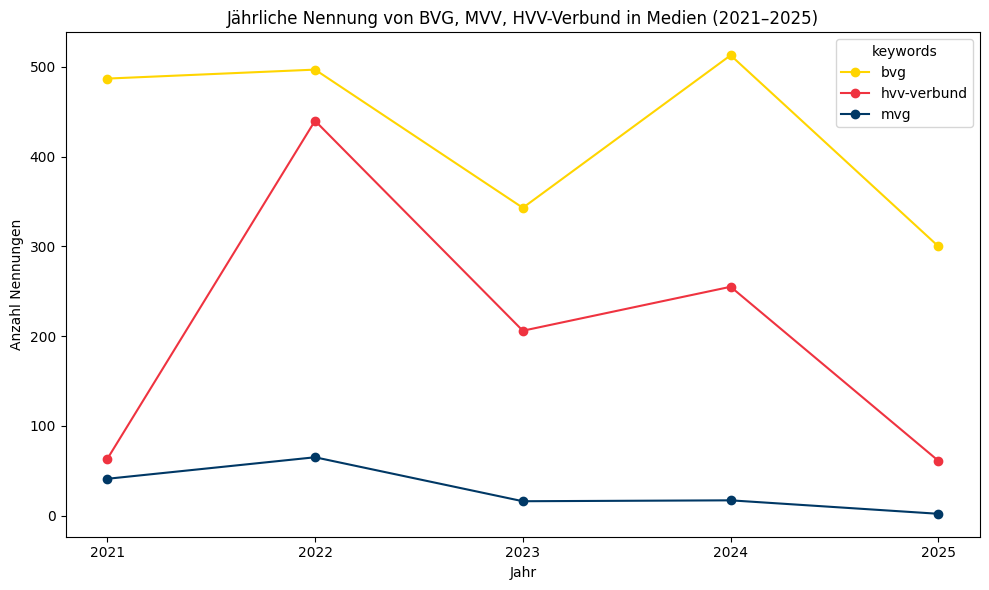

In [21]:
# Plot: Liniendiagramm Häufigkeit der Begriffe BVG, MVG, HVV-Verbund nach Jahren
# Vorbereitung
# Farbdefinitionen nach CI der Verkerhsunternehmen
farben = {
    "bvg": "#FFD500", # BVG-Gelb          
    "mvg": "#003865", # MVV-Blau
    "hvv-verbund": "#EF3340" # HVV-Rot
}

# Plot erstellen
plot_oepnv_trend(df_treffer_jahre, farben)

In [ ]:
# Häufigkeit der Begriffe BVG, MVG, HVV-Verbund nach Medien
# Gruppierung: Häufigkeit der Begriffe je Medium und Begriff summieren
df_treffer_quellen = df_treffer.groupby(["source", "keywords"])["count"].sum().unstack().fillna(0).astype(int)

# Relative Häufigkeit in %
df_treffer_quellen_prozent = df_treffer_quellen.div(df_treffer_quellen.sum(axis=1), axis=0) * 100

# Anzeigen
print("Absolute Häufigkeit nach Medium:")
print(df_treffer_quellen.sort_index())

print("\nRelative Häufigkeit nach Medium (%):")
print(df_treffer_quellen_prozent.round(2).sort_index())

Absolute Häufigkeit nach Medium:
keywords       bvg  hvv-verbund  mvg
source                              
abendblatt       2          991    0
berliner       742            0    0
boerse           0            0  116
dlf              1            0    0
faz              4            2    0
heise            7            2    0
mm               8            0    0
ntv             16            6    1
spiegel          9            0    0
stern            7            3    0
sz               4            2   23
t3n              6            0    0
tagesspiegel  1219            4    0
taz             94            2    0
welt            11            6    1
zeit            10            7    0

Relative Häufigkeit nach Medium (%):
keywords         bvg  hvv-verbund     mvg
source                                   
abendblatt      0.20        99.80    0.00
berliner      100.00         0.00    0.00
boerse          0.00         0.00  100.00
dlf           100.00         0.00    0.00
faz        

In [23]:
# Häufigkeit der Begriffe BVG, MVG, HVV-Verbund nach Medien und Jahren
# Pivot-Tabelle für bessere Lesbarkeit
for gruppe in df_treffer["keywords"].unique():
    df_tmp = df_treffer[df_treffer["keywords"] == gruppe]
    pivot = df_tmp.pivot_table(index="year", columns="source", values="count", aggfunc="sum", fill_value=0)
    print(f"\nPivot-Tabelle für {gruppe.upper()}:")
    display(pivot)


Pivot-Tabelle für BVG:


source  abendblatt  berliner  dlf  faz  heise  mm  ntv  spiegel  stern  sz  \
year                                                                         
2021             0        70    0    0      1   0    0        0      3   0   
2022             0        69    0    2      0   0    1        5      1   0   
2023             2       160    0    0      1   8    0        0      0   1   
2024             0       288    0    0      3   0    4        2      2   2   
2025             0       155    1    2      2   0   11        2      1   1   

source  t3n  tagesspiegel  taz  welt  zeit  
year                                        
2021      0           406    7     0     0  
2022      0           410    7     1     1  
2023      6           138   27     0     0  
2024      0           174   31     5     2  
2025      0            91   22     5     7


Pivot-Tabelle für MVG:


source  boerse  ntv  sz  welt
year                         
2021        37    0   3     1
2022        60    0   5     0
2023         4    0  12     0
2024        15    0   2     0
2025         0    1   1     0


Pivot-Tabelle für HVV-VERBUND:


source  abendblatt  faz  heise  ntv  stern  sz  tagesspiegel  taz  welt  zeit
year                                                                         
2021            54    0      1    3      1   0             4    0     0     0
2022           435    0      0    0      0   0             0    1     0     4
2023           201    2      1    0      1   0             0    0     1     0
2024           248    0      0    1      1   1             0    1     3     0
2025            53    0      0    2      0   1             0    0     2     3

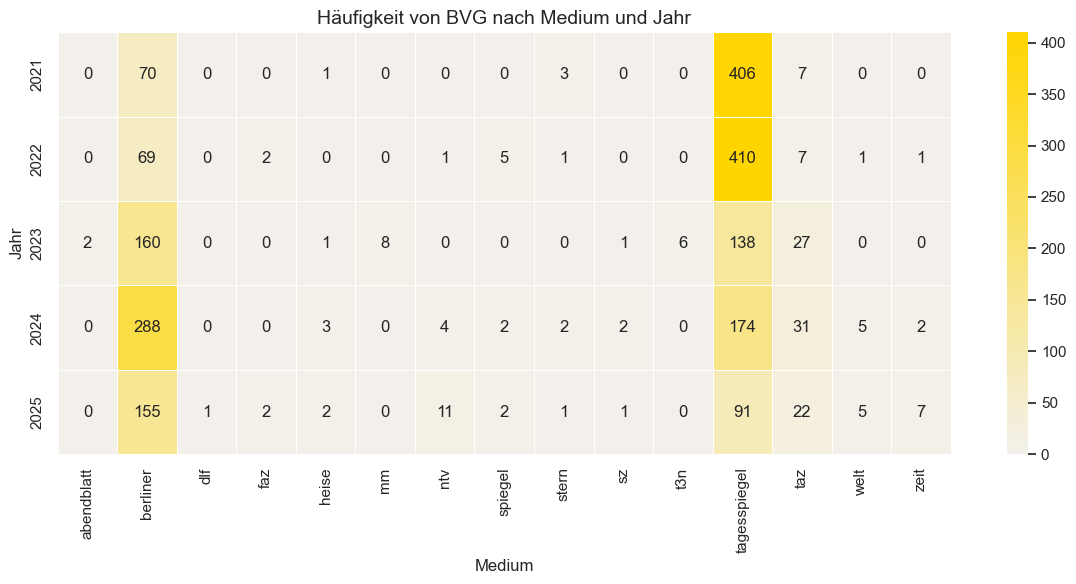

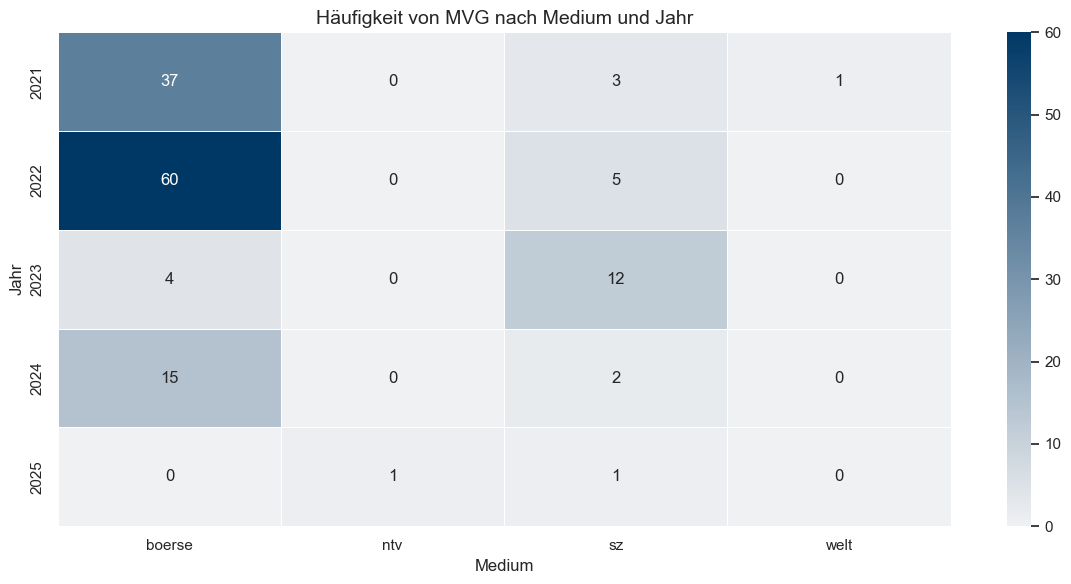

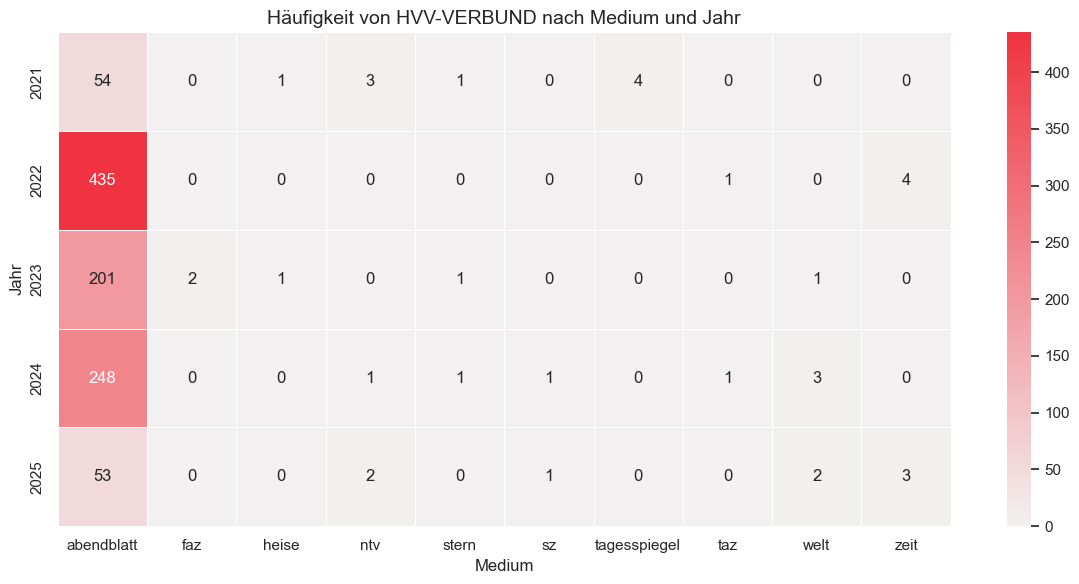

In [24]:
# Plot: Heatmap Häufigkeit der Begriffe BVG, MVG, HVV-Verbund nach Medien und Jahren
# Vorbereitung
sns.set_theme(style="whitegrid")

# Schleife über die Verkehrsunternehmen
for gruppe in df_treffer["keywords"].unique():
    # Filtern
    df_tmp = df_treffer[df_treffer["keywords"] == gruppe]

    # Pivot-Tabelle: Zeilen = Jahr, Spalten = Medium
    pivot = df_tmp.pivot_table(index="year", columns="source", values="count", aggfunc="sum", fill_value=0)

    # Heatmap zeichnen
    plt.figure(figsize=(12, 6))
    cmap_farbe = farben.get(gruppe, "gray")

    # Farbschema auf Basis einer Einzelfarbe
    sns.heatmap(pivot, cmap=sns.light_palette(cmap_farbe, as_cmap=True), annot=True, fmt="d", linewidths=0.5)

    # Plot Formatierung: Titel, Achsen, Layout 
    plt.title(f"Häufigkeit von {gruppe.upper()} nach Medium und Jahr", fontsize=14)
    plt.xlabel("Medium")
    plt.ylabel("Jahr")
    plt.tight_layout()
    plt.show()

In [25]:
# Prüfung Auffälligkeiten: Medium pro Cluster
cluster_quellen = df_treffer.groupby("cluster")["source"].value_counts()
print(cluster_quellen)

cluster               source      
Digital               ntv              22
Große Medien          taz              75
                      sz               27
                      welt             17
                      zeit             15
                      stern            10
                      spiegel           9
                      faz               4
Regional              tagesspiegel    741
                      abendblatt      710
                      berliner        473
Technologie           heise             9
                      t3n               5
Wirtschaft            boerse          102
                      mm                8
Öffentlich-rechtlich  dlf               1
Name: count, dtype: int64


In [26]:
# Prüfung Auffälligkeiten: Rohdaten tagesschau
df_medien[df_medien["source"] == "tagesschau"]

count             word      source       date               cluster  \
797         21            pfeil  tagesschau 2021-04-01  Öffentlich-rechtlich   
798          8       tagesschau  tagesschau 2021-04-01  Öffentlich-rechtlich   
799          8       startseite  tagesschau 2021-04-01  Öffentlich-rechtlich   
800          7           inland  tagesschau 2021-04-01  Öffentlich-rechtlich   
801          7          ausland  tagesschau 2021-04-01  Öffentlich-rechtlich   
...        ...              ...         ...        ...                   ...   
2936007      1            suche  tagesschau 2025-04-30  Öffentlich-rechtlich   
2936008      1      suchbegriff  tagesschau 2025-04-30  Öffentlich-rechtlich   
2936009      1         fußzeile  tagesschau 2025-04-30  Öffentlich-rechtlich   
2936010      1           inhalt  tagesschau 2025-04-30  Öffentlich-rechtlich   
2936011      1  nebennavigation  tagesschau 2025-04-30  Öffentlich-rechtlich   

         year keywords  
797      2021     None  
798      2021     None  
799      2021     None  
800      2021     None  
801      2021     None  
...       ...      ...  
2936007  2025     None  
2936008  2025     None  
2936009  2025     None  
2936010  2025     None  
2936011  2025     None  

[1170105 rows x 7 columns]

In [27]:
# Prüfung Auffälligkeiten: Rohdaten handelsblatt
df_medien[df_medien["source"] == "handelsblatt"]

count          word        source       date     cluster  year  \
2936012      54            :   handelsblatt 2021-04-01  Wirtschaft  2021   
2936013      49         mehr…  handelsblatt 2021-04-01  Wirtschaft  2021   
2936014      28         image  handelsblatt 2021-04-01  Wirtschaft  2021   
2936015      22         mehr…  handelsblatt 2021-04-01  Wirtschaft  2021   
2936016      22  handelsblatt  handelsblatt 2021-04-01  Wirtschaft  2021   
...         ...           ...           ...        ...         ...   ...   
11284485      1            to  handelsblatt 2025-04-30  Wirtschaft  2025   
11284486      1      continue  handelsblatt 2025-04-30  Wirtschaft  2025   
11284487      1         using  handelsblatt 2025-04-30  Wirtschaft  2025   
11284488      1          this  handelsblatt 2025-04-30  Wirtschaft  2025   
11284489      1  application.  handelsblatt 2025-04-30  Wirtschaft  2025   

         keywords  
2936012      None  
2936013      None  
2936014      None  
2936015      None  
2936016      None  
...           ...  
11284485     None  
11284486     None  
11284487     None  
11284488     None  
11284489     None  

[1392001 rows x 7 columns]

In [28]:
# Prüfung Auffälligkeiten: Keyword tagesschau
df_medien[df_medien["source"] == "tagesschau"]["keywords"].value_counts(dropna=False)

keywords
None    1170105
Name: count, dtype: int64

In [29]:
# Prüfung Auffälligkeiten: Keyword handelsblatt
df_medien[df_medien["source"] == "handelsblatt"]["keywords"].value_counts(dropna=False)

keywords
None    1392001
Name: count, dtype: int64

In [30]:
# Häufigkeit nach Cluster und Begriff
häufigkeiten = df_treffer.groupby(["cluster", "keywords"]).size().unstack(fill_value=0)

# Ergebnisse anzeigen
print(häufigkeiten)

keywords               bvg  hvv-verbund  mvg
cluster                                     
Digital                 15            6    1
Große Medien           114           21   22
Regional              1213          711    0
Technologie             12            2    0
Wirtschaft               8            0  102
Öffentlich-rechtlich     1            0    0


In [31]:
# Pivot-Tabelle: Häufigkeit der Begriffe BVG, MVG, HVV nach Jahr und Cluster
pivot_cluster = df_treffer.groupby(["year", "cluster", "keywords"])["count"] \
    .sum().unstack().fillna(0).astype(int)

# Ergebnisse anzeigen
display(pivot_cluster)

keywords                   bvg  hvv-verbund  mvg
year cluster                                    
2021 Digital                 0            3    0
     Große Medien           10            1    4
     Regional              476           58    0
     Technologie             1            1    0
     Wirtschaft              0            0   37
2022 Digital                 1            0    0
     Große Medien           17            5    5
     Regional              479          435    0
     Wirtschaft              0            0   60
2023 Große Medien           28            4   12
     Regional              300          201    0
     Technologie             7            1    0
     Wirtschaft              8            0    4
2024 Digital                 4            1    0
     Große Medien           44            6    2
     Regional              462          248    0
     Technologie             3            0    0
     Wirtschaft              0            0   15
2025 Digital                11            2    1
     Große Medien           40            6    1
     Regional              246           53    0
     Technologie             2            0    0
     Öffentlich-rechtlich    1            0    0

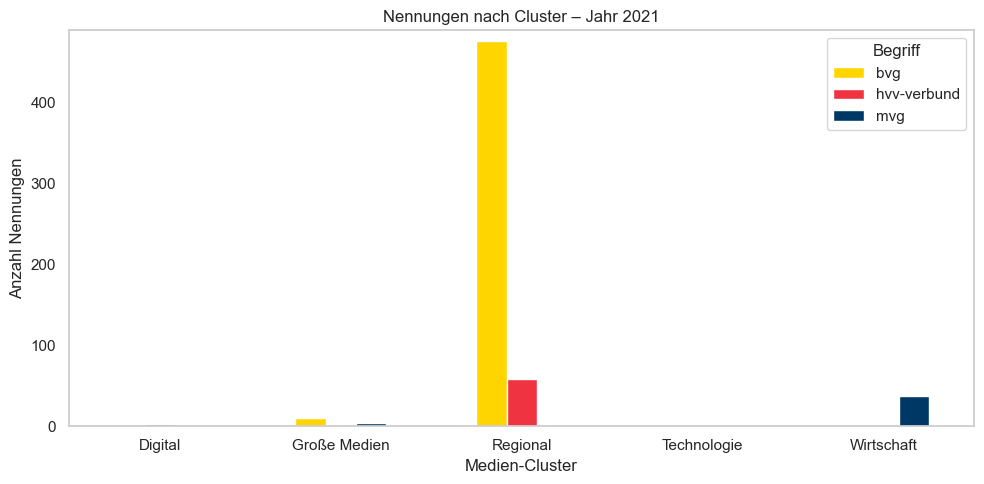

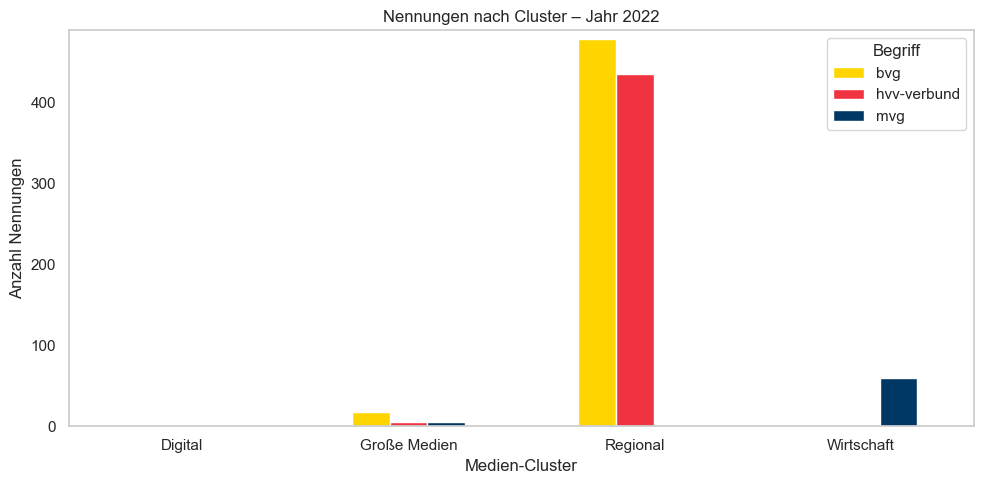

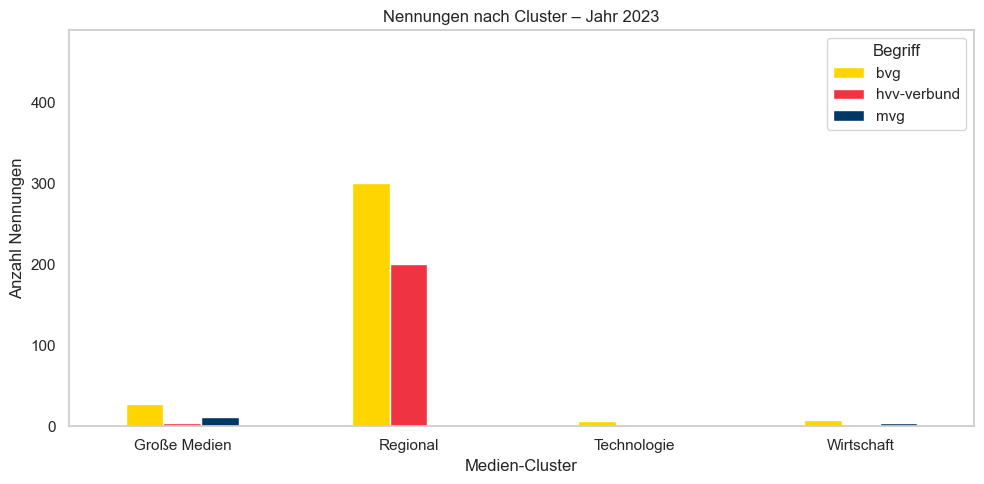

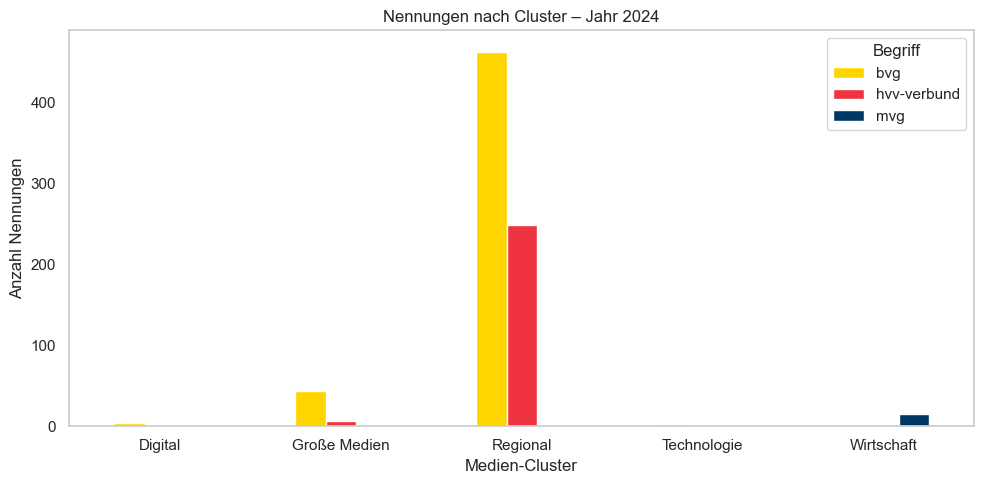

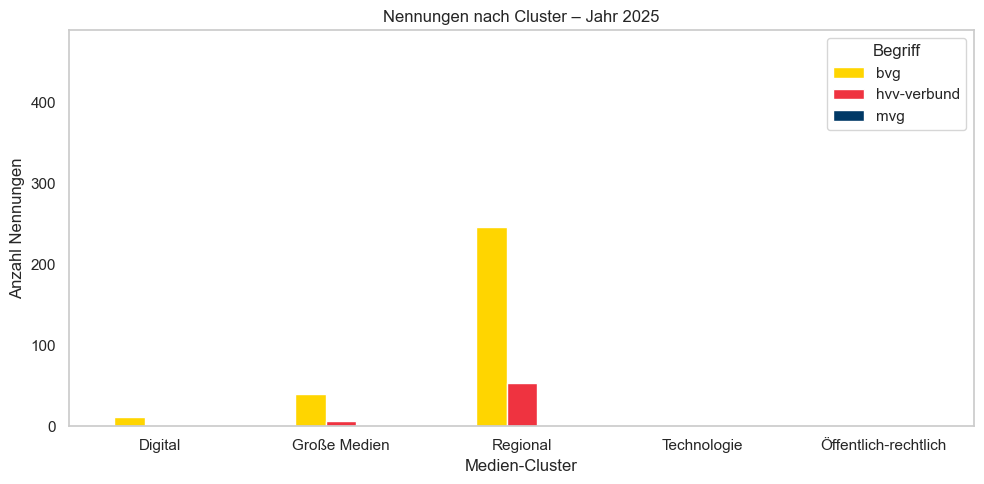

In [32]:
# Plot: Gruppiertes Balkendiagramm Häufigkeit der Begriffe BVG, MVG, HVV-Verbund nach Medien-Clustern und Jahren
# Vorbereitung
# Liste aller Jahre im Datensatz
jahre = pivot_cluster.index.get_level_values("year").unique()

# Gleiche Skalierung für alle Balkendiagramme
# Maximalwert über alle Jahre & Begriffe
max_wert = pivot_cluster.max().max()

# Für jedes Jahr Balkendiagramm nach Medien-Clustern und Begriffen erzeugen
for year in jahre:
    df_plot = pivot_cluster.loc[year]

    # Gruppiertes Balkendiagramm
    ax = df_plot.plot(
        kind="bar",
        figsize=(10, 5),
        color=[farben.get(k, "gray") for k in df_plot.columns]
    )

    # Plot Formatierung: Titel, Achsen, Layout 
    plt.title(f"Nennungen nach Cluster – Jahr {year}")
    plt.ylabel("Anzahl Nennungen")
    plt.xlabel("Medien-Cluster")
    plt.xticks(rotation=0)  # Beschriftung horizontal
    plt.ylim(0, max_wert + 10) # Skalierung mit Puffer
    plt.legend(title="Begriff")
    plt.tight_layout()
    plt.grid(False)
    plt.show()

##### 3.3 Wortformen mit den Begriffen BVG, HVV und MVG  

In [33]:
# Vorbereitung
# Begriffsliste & Farben
begriffsliste = ["bvg", "mvg", "hvv", "vhh", "hochbahn"]

farben = {
    "bvg": "#FFD500", # BVG-Gelb
    "mvg": "#003865", # MVG-Blau
    "hvv": "#EF3340", # HVV-Rot
    "vhh": "#EF3340", # gehört zu HVV
    "hochbahn": "#EF3340" # gehört zu HVV
}

In [34]:
# Wortformen, die BVG, MVG oder HVV (inkl. VHH und Hochbahn) beinhalten (aus ausgelagerter Funktion)
df_oepnv = oepnv_wortformen(df_medien, begriffsliste)

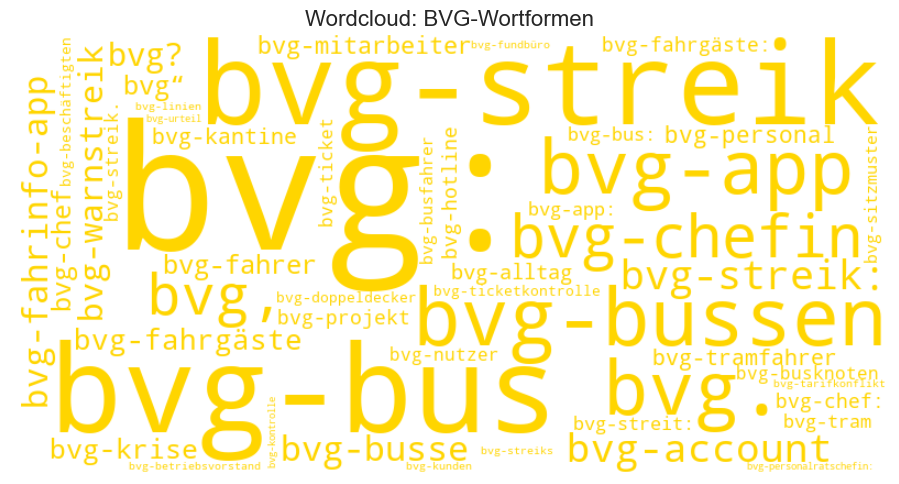

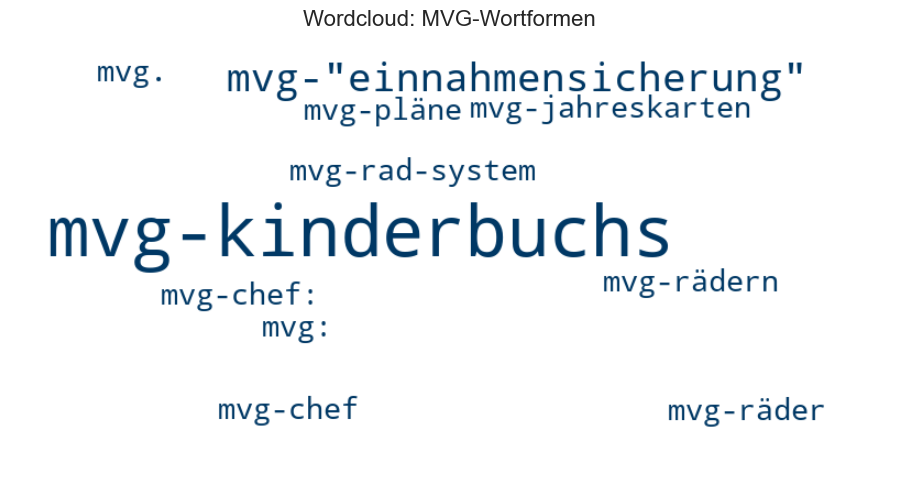

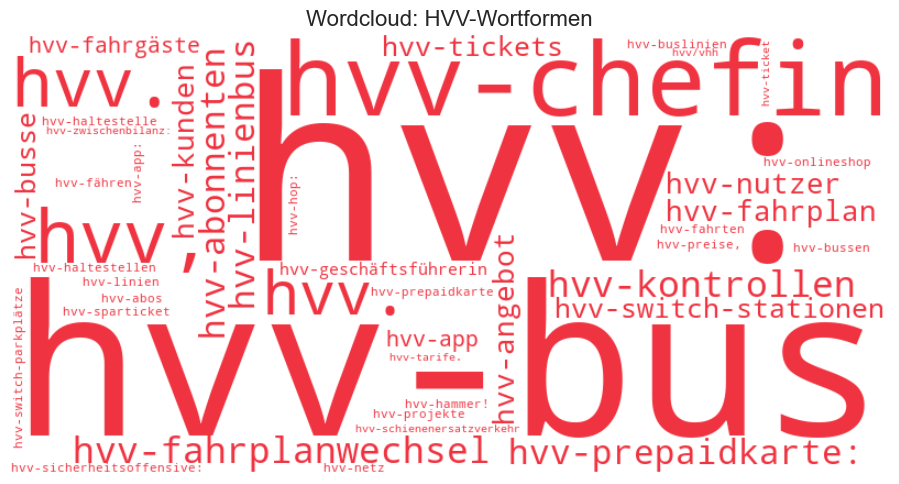

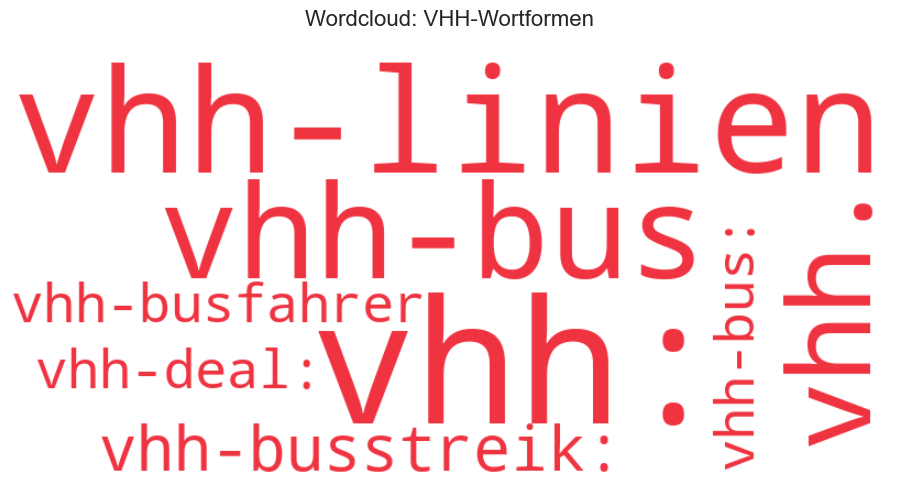

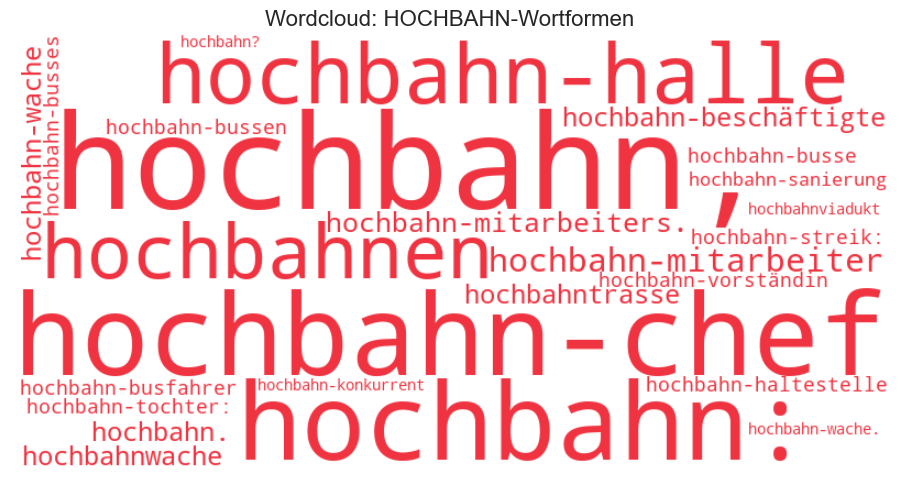

In [35]:
# Plot: Wordclouds für Wortformen, die mit BVG, MVG oder HVV beginnen (alle Jahre zusammengefasst, aus ausgelagerter Funktion)
plot_wordclouds_gesamt(df_oepnv, begriffsliste, farben)

BVG 2021: 44 Wortformen gefunden.


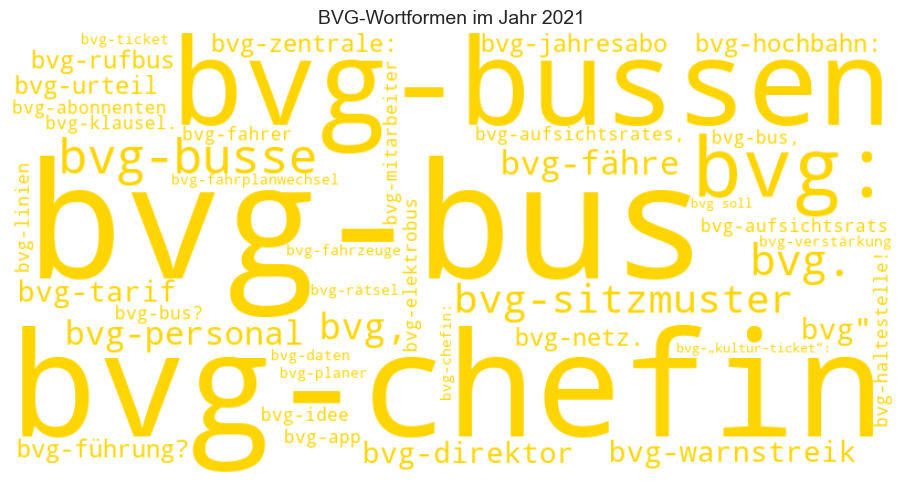

BVG 2022: 49 Wortformen gefunden.


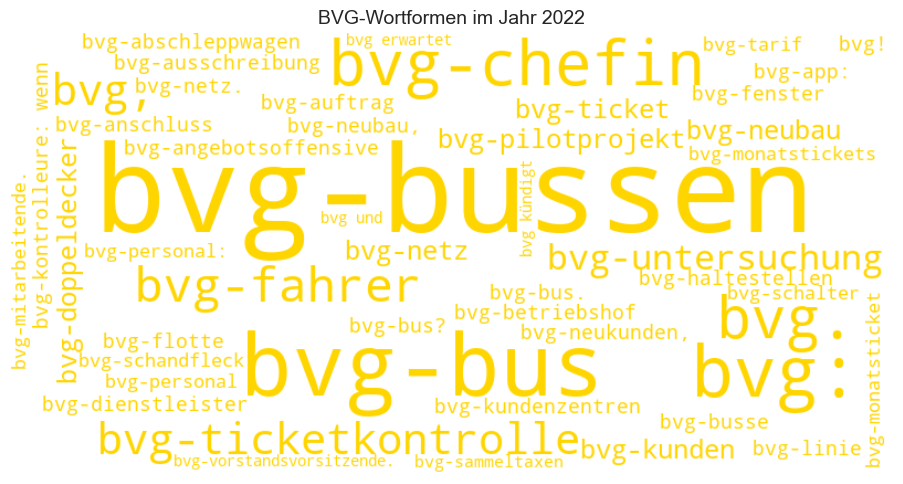

BVG 2023: 50 Wortformen gefunden.


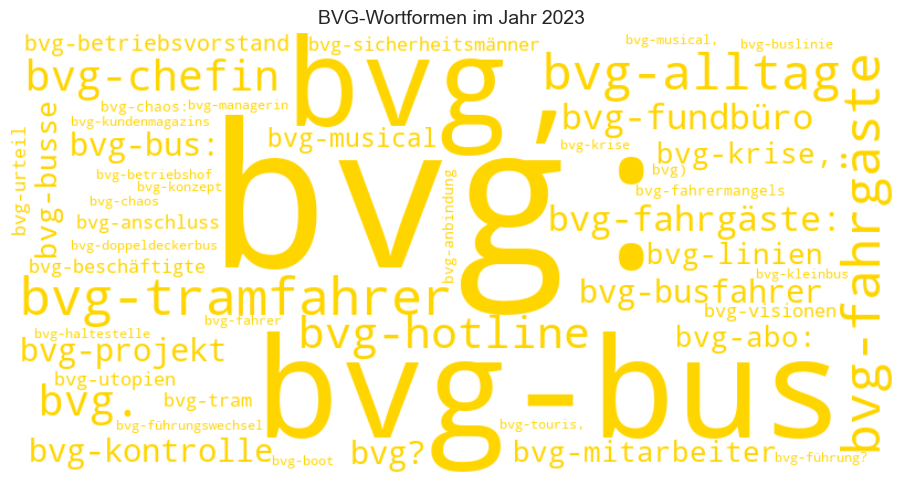

BVG 2024: 50 Wortformen gefunden.


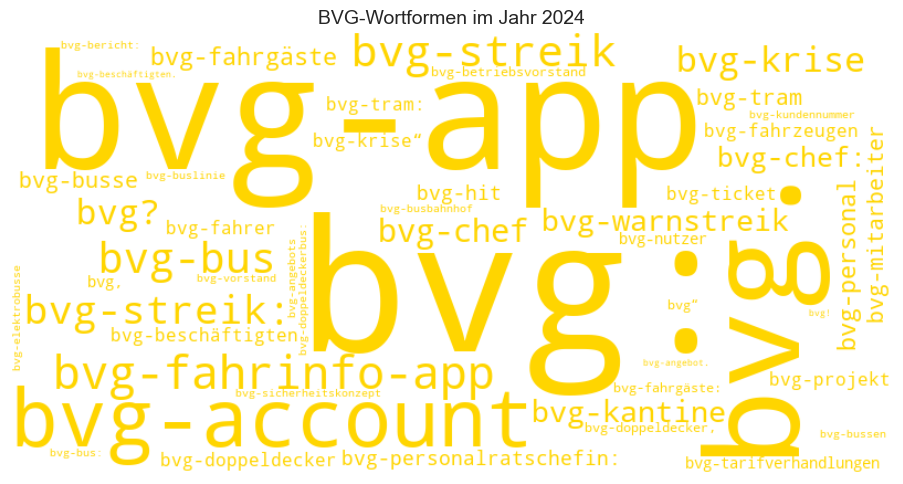

BVG 2025: 50 Wortformen gefunden.


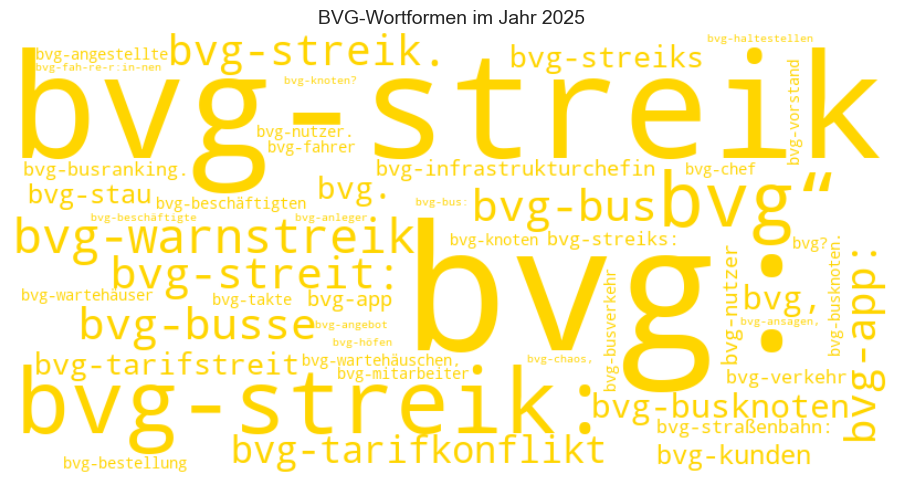

MVG 2021: 1 Wortformen gefunden.


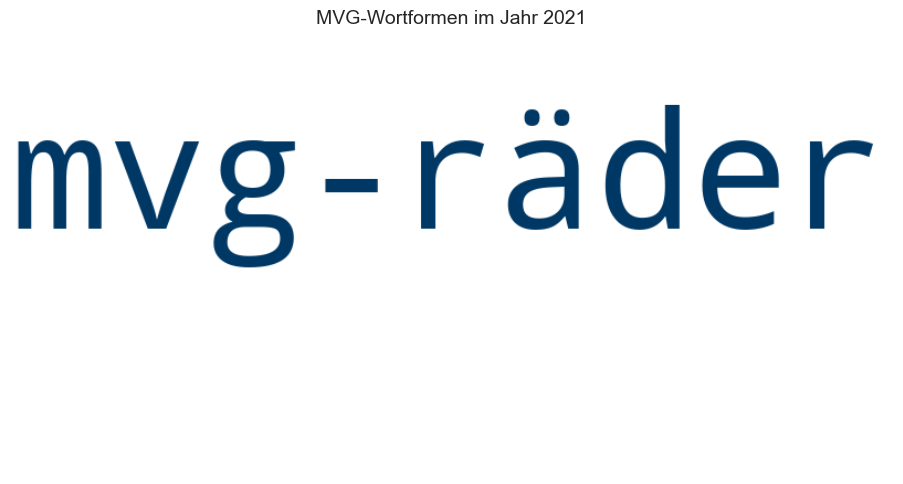

MVG 2022: 5 Wortformen gefunden.


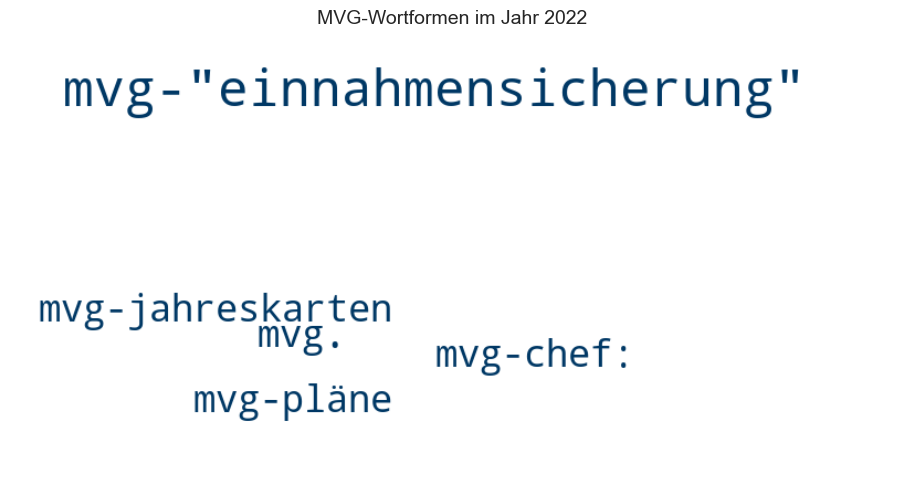

MVG 2023: 3 Wortformen gefunden.


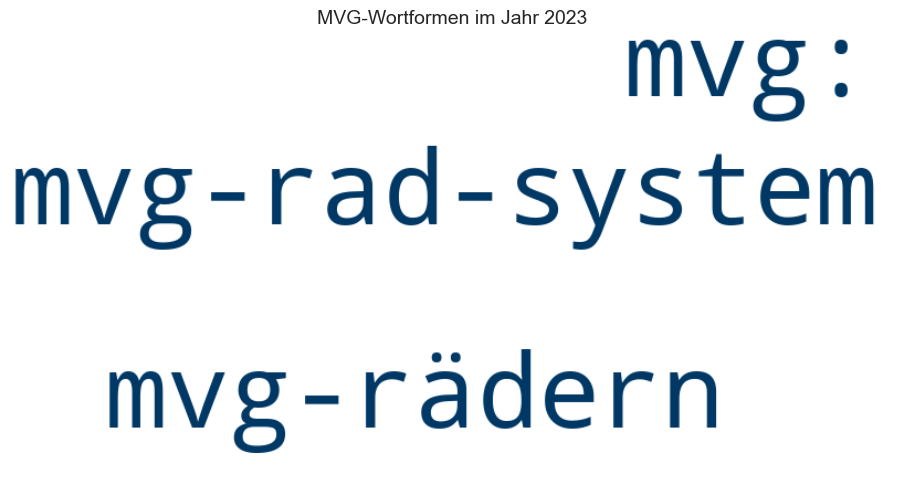

MVG 2024: 2 Wortformen gefunden.


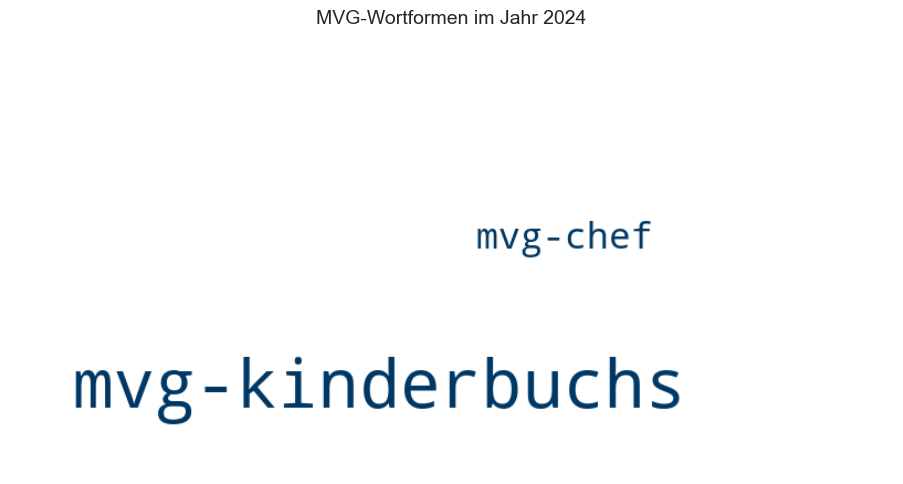

HVV 2021: 10 Wortformen gefunden.


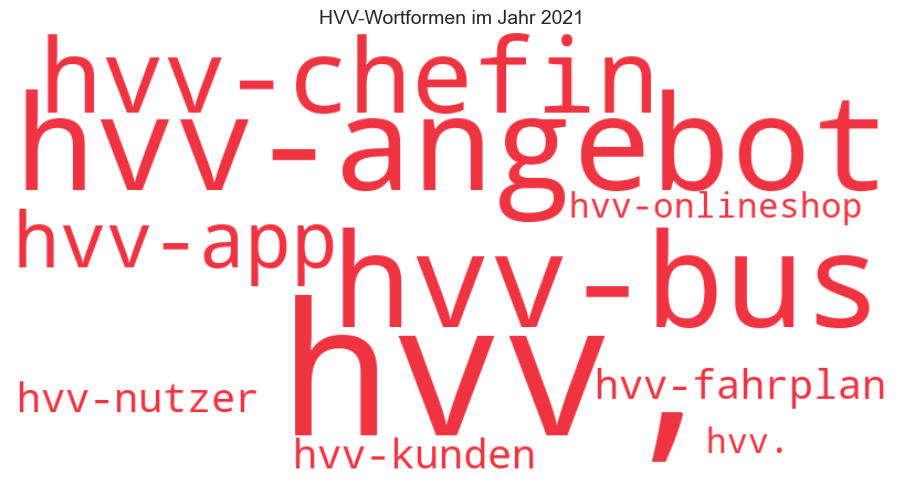

HVV 2022: 17 Wortformen gefunden.


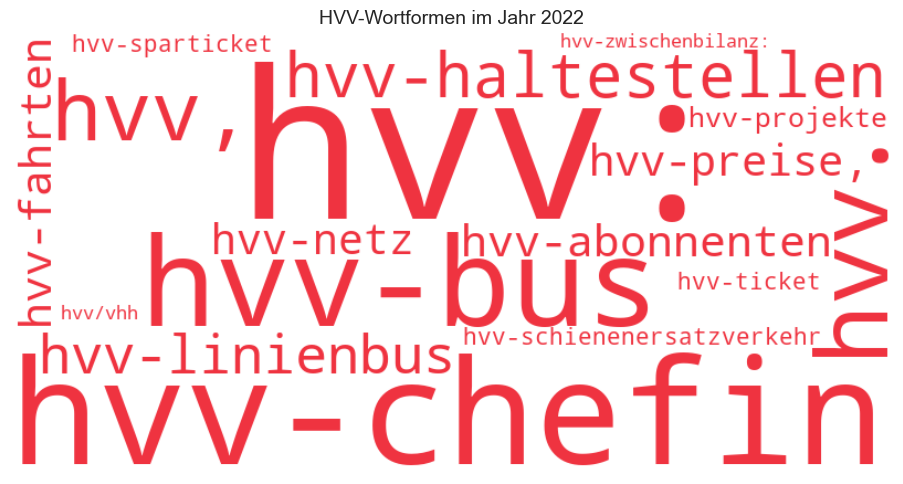

HVV 2023: 18 Wortformen gefunden.


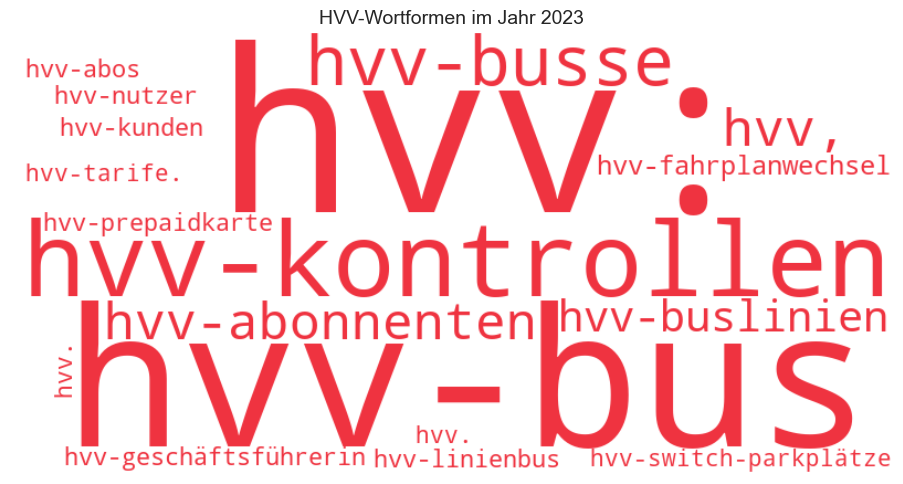

HVV 2024: 20 Wortformen gefunden.


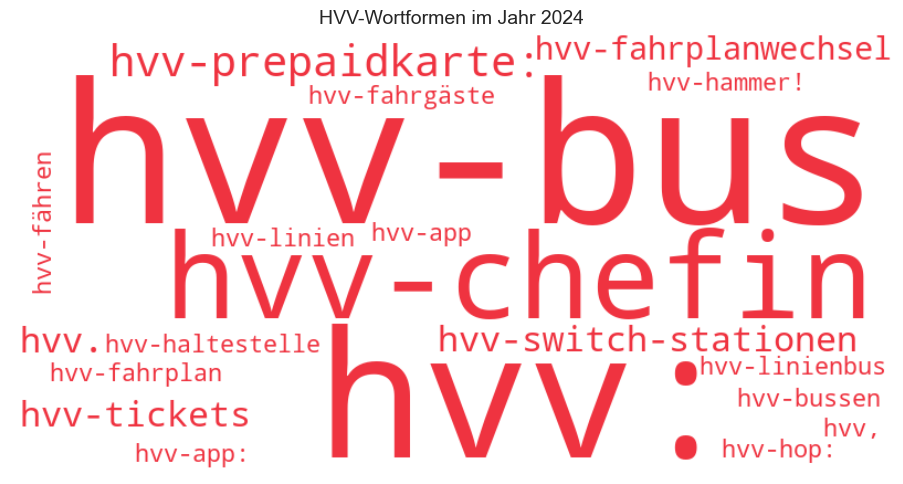

HVV 2025: 7 Wortformen gefunden.


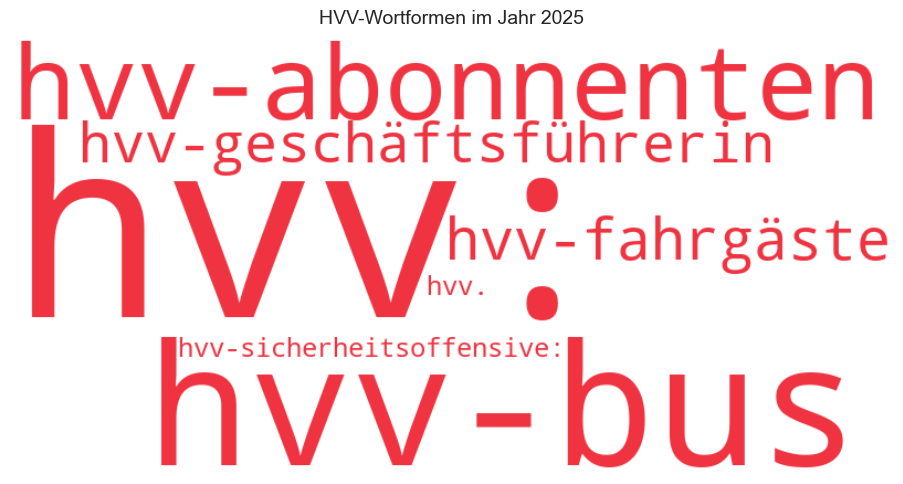

VHH 2022: 1 Wortformen gefunden.


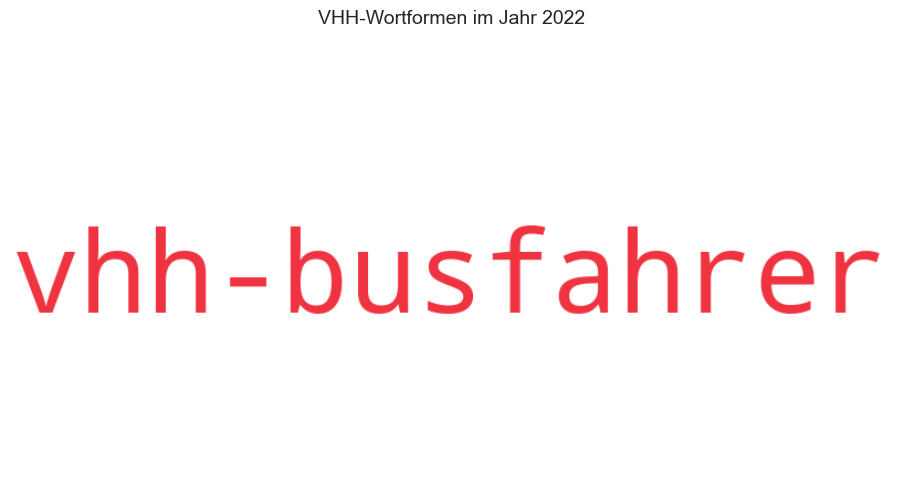

VHH 2023: 1 Wortformen gefunden.


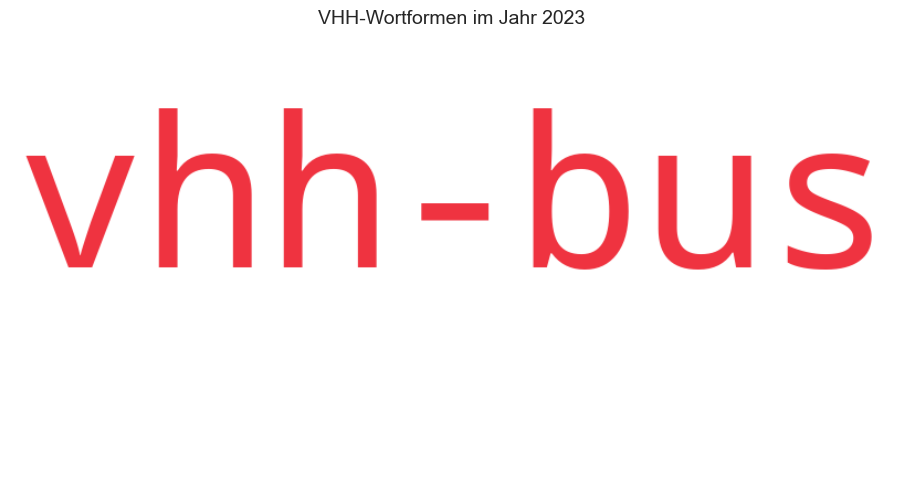

VHH 2024: 4 Wortformen gefunden.


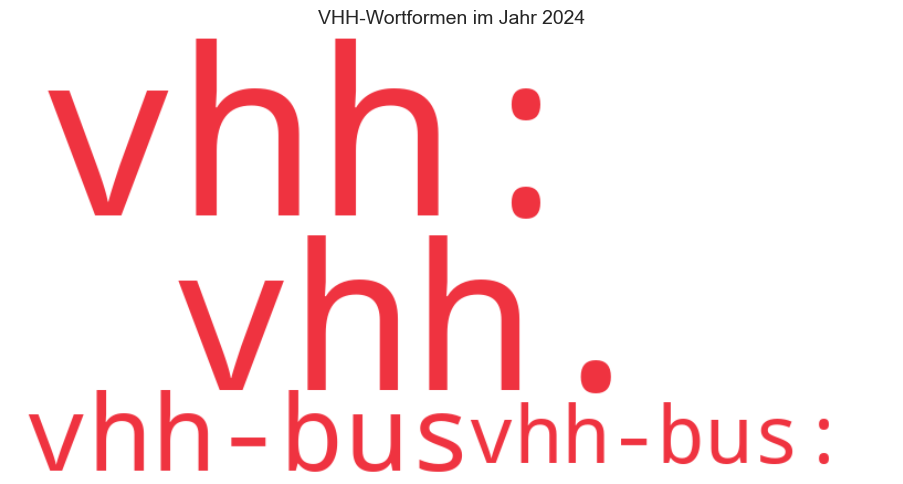

VHH 2025: 4 Wortformen gefunden.


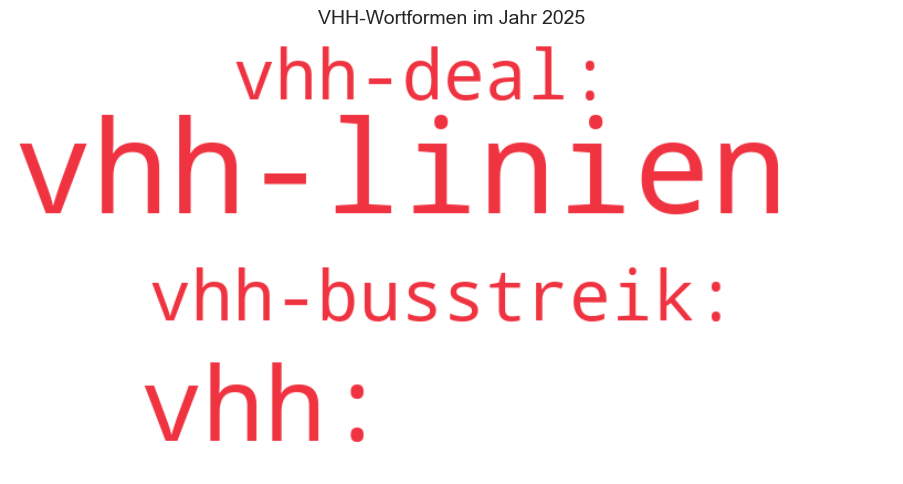

HOCHBAHN 2021: 2 Wortformen gefunden.


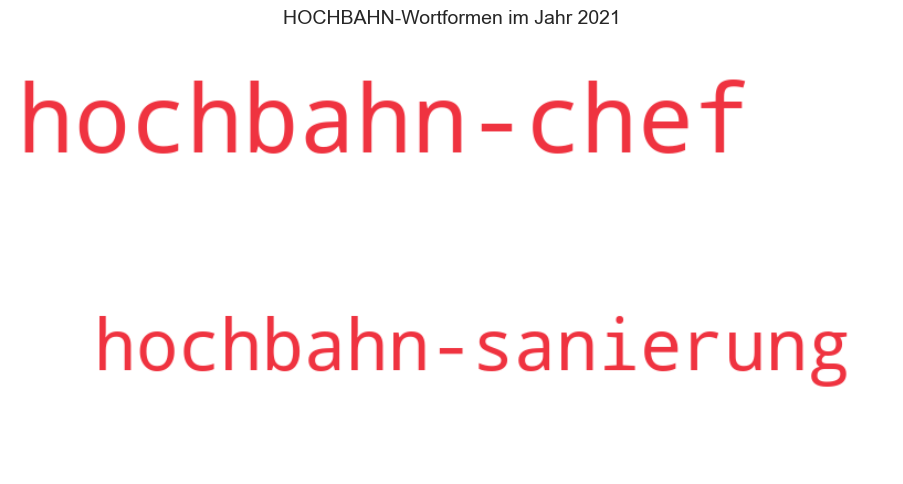

HOCHBAHN 2022: 5 Wortformen gefunden.


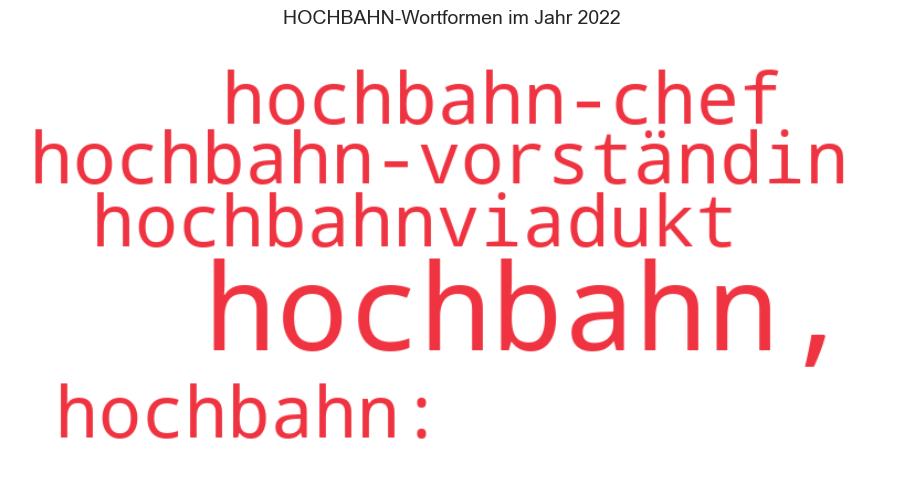

HOCHBAHN 2023: 11 Wortformen gefunden.


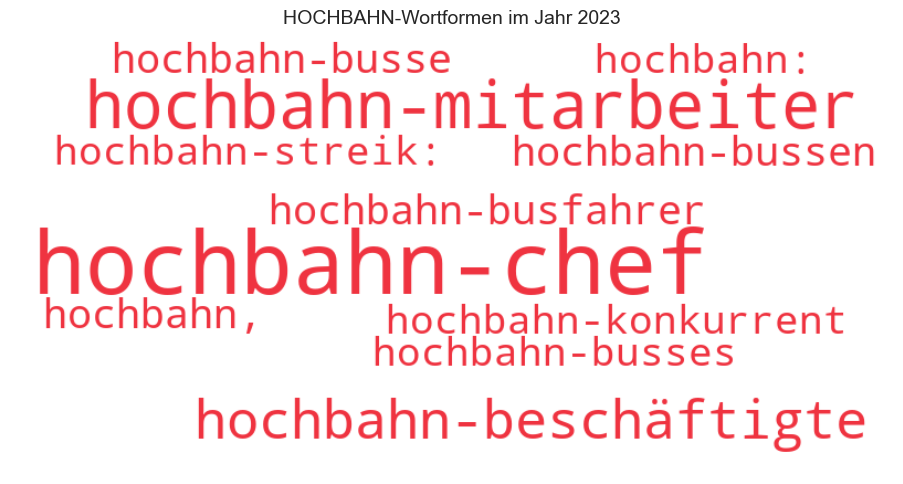

HOCHBAHN 2024: 11 Wortformen gefunden.


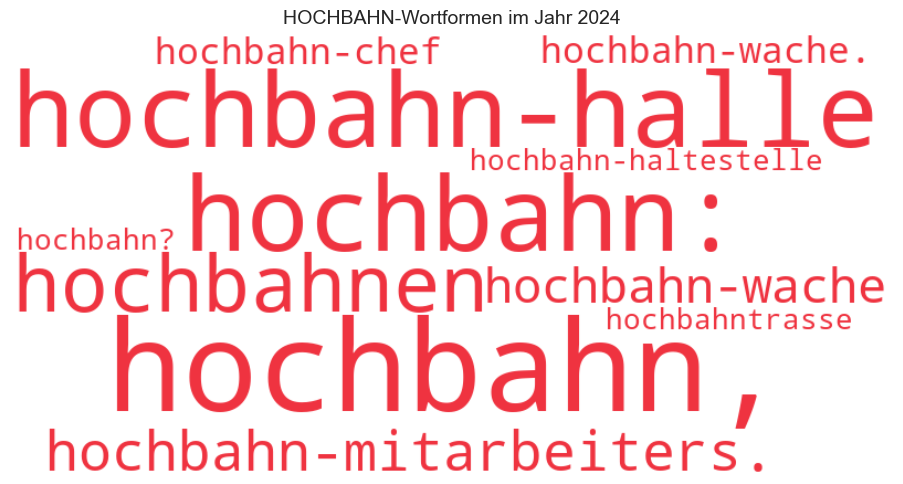

HOCHBAHN 2025: 5 Wortformen gefunden.


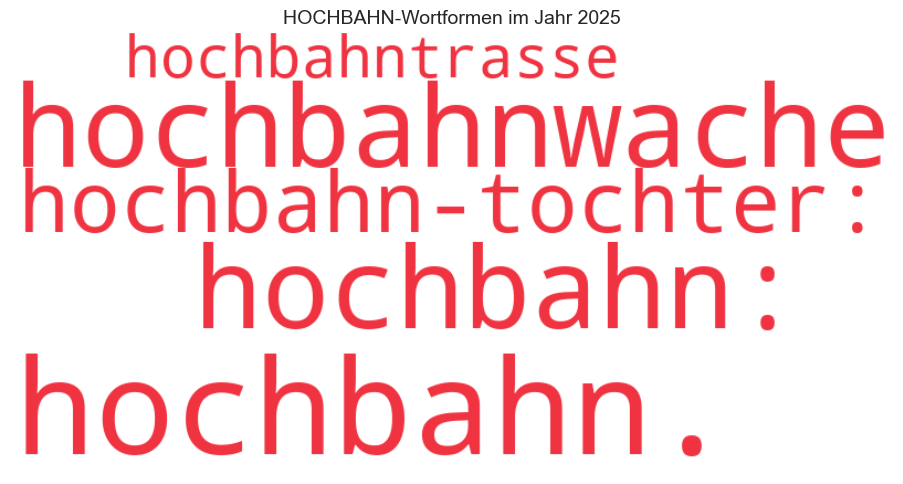

In [36]:
# Plot: Wordclouds für Wortformen, die mit BVG, MVG oder HVV beginnen pro Jahr (aus ausgelagerter Funktion)
plot_wordclouds_pro_jahr(df_oepnv, begriffsliste, farben)

In [37]:
# Top-Wortformen pro Cluster für BVG 
analyse_wortformen(df_medien, keyword="bvg")


Top-Wortformen mit 'bvg' in Cluster: Digital


cluster              word  count
0  Digital               bvg     16
1  Digital  bvg-beschäftigte      1
2  Digital           bvg-bus      1
3  Digital         bvg-chef:      1
4  Digital      bvg-fundbüro      1
5  Digital        bvg-streit      1
6  Digital    bvg-warnstreik      1
7  Digital              bvg:      1


Top-Wortformen mit 'bvg' in Cluster: Große Medien


cluster               word  count
10  Große Medien                bvg    139
12  Große Medien               bvg,      7
29  Große Medien  bvg-tarifkonflikt      6
39  Große Medien               bvg:      6
38  Große Medien               bvg.      5
37  Große Medien     bvg-warnstreik      4
9   Große Medien              (bvg)      3
28  Große Medien         bvg-streik      3
14  Große Medien    bvg-angestellte      2
17  Große Medien           bvg-chef      2


Top-Wortformen mit 'bvg' in Cluster: Regional


cluster         word  count
45   Regional          bvg   1963
222  Regional         bvg:    256
76   Regional      bvg-bus    102
186  Regional   bvg-streik     89
89   Regional   bvg-bussen     82
221  Regional         bvg.     67
188  Regional  bvg-streik:     37
49   Regional         bvg,     31
88   Regional    bvg-busse     28
96   Regional   bvg-chefin     28


Top-Wortformen mit 'bvg' in Cluster: Technologie


cluster              word  count
235  Technologie           bvg-app     55
234  Technologie       bvg-account     36
236  Technologie  bvg-fahrinfo-app     26
233  Technologie               bvg     13
238  Technologie              bvg:      2
232  Technologie             (bvg)      1
237  Technologie      bvg-klausel.      1


Top-Wortformen mit 'bvg' in Cluster: Wirtschaft


cluster        word  count
242  Wirtschaft  bvg-chefin     13
240  Wirtschaft         bvg      8
239  Wirtschaft       (bvg)      2
241  Wirtschaft    bvg-chef      1
243  Wirtschaft  bvg-urteil      1


Top-Wortformen mit 'bvg' in Cluster: Öffentlich-rechtlich


cluster             word  count
245  Öffentlich-rechtlich     bvg-direktor      3
247  Öffentlich-rechtlich       bvg-urteil      3
244  Öffentlich-rechtlich              bvg      1
246  Öffentlich-rechtlich  bvg-tarifstreit      1

In [38]:
# Top-Wortformen pro Cluster für HVV 
analyse_wortformen(df_medien, keyword="hvv")


Top-Wortformen mit 'hvv' in Cluster: Digital


cluster                 word  count
0  Digital                  hvv      3
1  Digital  hvv-zwischenbilanz:      1
2  Digital                 hvv:      1


Top-Wortformen mit 'hvv' in Cluster: Große Medien


cluster            word  count
8  Große Medien            hvv:      9
3  Große Medien             hvv      8
6  Große Medien      hvv-chefin      7
4  Große Medien            hvv,      1
5  Große Medien  hvv-abonnenten      1
7  Große Medien     hvv-tarife.      1


Top-Wortformen mit 'hvv' in Cluster: Regional


cluster                 word  count
12  Regional                  hvv    796
19  Regional              hvv-bus     31
55  Regional                 hvv:     27
23  Regional           hvv-chefin      6
13  Regional                 hvv,      5
53  Regional                hvv.       5
52  Regional                 hvv.      4
26  Regional  hvv-fahrplanwechsel      3
34  Regional       hvv-kontrollen      3
37  Regional        hvv-linienbus      3

In [39]:
# Top-Wortformen pro Cluster für VHH 
analyse_wortformen(df_medien, keyword="vhh")


Top-Wortformen mit 'vhh' in Cluster: Digital


cluster        word  count
0  Digital         vhh      1
1  Digital  vhh-linien      1


Top-Wortformen mit 'vhh' in Cluster: Große Medien


cluster        word  count
2  Große Medien         vhh      2
3  Große Medien  vhh-linien      1


Top-Wortformen mit 'vhh' in Cluster: Regional


cluster            word  count
5   Regional             vhh     44
13  Regional            vhh:      7
6   Regional         vhh-bus      4
11  Regional      vhh-linien      3
12  Regional            vhh.      3
4   Regional         hvv/vhh      1
7   Regional        vhh-bus:      1
8   Regional   vhh-busfahrer      1
9   Regional  vhh-busstreik:      1
10  Regional       vhh-deal:      1

In [40]:
# Top-Wortformen pro Cluster für Hochbahn 
analyse_wortformen(df_medien, keyword="hochbahn")


Top-Wortformen mit 'hochbahn' in Cluster: Digital


cluster                   word  count
0  Digital               hochbahn      2
4  Digital              hochbahn:      2
1  Digital  hochbahn-beschäftigte      1
2  Digital        hochbahn-bussen      1
3  Digital         hochbahn-halle      1
5  Digital         hochbahntrasse      1


Top-Wortformen mit 'hochbahn' in Cluster: Große Medien


cluster            word  count
6   Große Medien        hochbahn     12
8   Große Medien  hochbahn-halle      4
11  Große Medien   hochbahnwache      2
7   Große Medien  hochbahn-busse      1
9   Große Medien       hochbahn:      1
10  Große Medien  hochbahntrasse      1


Top-Wortformen mit 'hochbahn' in Cluster: Regional


cluster                    word  count
13  Regional                hochbahn    155
14  Regional               hochbahn,     13
18  Regional           hochbahn-chef     10
30  Regional               hochbahn:      6
32  Regional              hochbahnen      4
21  Regional    hochbahn-mitarbeiter      3
12  Regional           bvg-hochbahn:      2
22  Regional  hochbahn-mitarbeiters.      2
27  Regional          hochbahn-wache      2
29  Regional               hochbahn.      2


Top-Wortformen mit 'hochbahn' in Cluster: Technologie


cluster      word  count
34  Technologie  hochbahn      2

In [41]:
# Top-Wortformen pro Cluster für MVG 
analyse_wortformen(df_medien, keyword="mvg")


Top-Wortformen mit 'mvg' in Cluster: Digital


cluster             word  count
0  Digital            "mvg"      8
1  Digital  "mvg"-heimspiel      1
2  Digital              mvg      1


Top-Wortformen mit 'mvg' in Cluster: Große Medien


cluster                      word  count
3   Große Medien                       mvg     24
4   Große Medien  mvg-"einnahmensicherung"      2
5   Große Medien                  mvg-chef      1
6   Große Medien                 mvg-chef:      1
7   Große Medien          mvg-jahreskarten      1
8   Große Medien                 mvg-pläne      1
9   Große Medien            mvg-rad-system      1
10  Große Medien                 mvg-räder      1
11  Große Medien                mvg-rädern      1
12  Große Medien                      mvg.      1


Top-Wortformen mit 'mvg' in Cluster: Technologie


cluster   word  count
14  Technologie  (mvg)      2


Top-Wortformen mit 'mvg' in Cluster: Wirtschaft


cluster             word  count
16  Wirtschaft              mvg    116
17  Wirtschaft  mvg-kinderbuchs     15
15  Wirtschaft            (mvg)      3